# Adam Thomson - PHY573 - Week 3

## Deutsch-Jozsa Algorithm

The goal of the Deutsch-Jozsa Algorithm is to answer the question of whether a given oracle function is "constant" or "balanced". In other words, the algorithm will take an input function that always returns either the same single-bit answer or has a 50/50 chance of returning either a 0 or 1, and will determine which category the function is in. Classically, the best case scenario is querying the function twice and receiving different values to identify a balanced function; in the worst case it must query the function for more than half of all possible inputs to ensure it is constant. However, if the input function is implemented on a quantum computer, then the answer can be determined in a single query every time! Let's take a closer look at how this is possible by following the qiskit notebook https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/deutsch-jozsa.ipynb

In [323]:
# Import libraies
import numpy as np
from IPython.display import Math
from qiskit import QuantumCircuit as QCir, transpile
from qiskit.visualization import plot_histogram, plot_distribution

from qiskit_aer import AerSimulator

sampler = AerSimulator()

### Inspect the Quantum Solution

In [324]:
# We start with an initial state of a quantum register with as many qubits as the oracle function
#  takes as input, n, in |0> and an additional qubit initialized to |1>

display(Math(r'\ket{\psi_0} = \ket0 ^{\otimes n} \ket1'))

<IPython.core.display.Math object>

In [325]:
# We then apply a Haddamard gate to each qubit and simplify the state expression

display(Math(r'\ket{\psi_1} = H^{\otimes n + 1}\ket{\psi_0}'))
display(Math(r'\ket{\psi_1} = H^{\otimes n} \ket0^{\otimes n} \otimes H\ket1'))

display(Math(r'''
    H^{\otimes n} \ket0 = H\ket0 \otimes H\ket0 ... \otimes H\ket0
\\\\\qquad\qquad   = \frac1{\sqrt2}(\ket0 + \ket1) \otimes ... \otimes \frac1{\sqrt2}(\ket0 + \ket1)
\\\\\qquad\qquad   = \frac1{\sqrt{2^n}} \Big( \ket0 + \ket1 + \ket2 + ... + \ket{2^n - 1}  \Big)
\\\\\qquad\qquad   = \frac1{\sqrt{2^n}} \sum_{x=0}^{2^n -1} \ket x
'''))

display(Math(r'''
    \ket{\psi_1} = H^{\otimes n} \ket0 \otimes H\ket1
\\\\\qquad = \frac1{\sqrt{2^n}} \sum_{x=0}^{2^n -1} \ket x \otimes (\frac1{\sqrt2})(\ket0 - \ket1)
'''))

display(Math(r'''
    \ket{\psi_1} = \frac1{\sqrt{2^{n + 1}}} \sum_{x=0}^{2^n -1} \ket x(\ket0 - \ket1)
'''))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [326]:
# Apply the oracle function
display(Math(r'''
\text{Next, apply the oracle function on } \ket{\psi_1} \text{ such that } f(\ket x \ket y) = \ket x \ket{y \oplus f(x)}
'''))

display(Math(r'''
\ket{\psi_2} = f \big( \frac1{\sqrt{2^{n + 1}}} \sum_{x=0}^{2^n -1} \ket x(\ket0 - \ket1) \big)
\\\\ \qquad = \frac1{\sqrt{2^{n + 1}}}\sum_{x=0}^{2^n -1} (f\ket x (\ket0 - \ket1))
\\\\ \qquad = \frac1{\sqrt{2^{n + 1}}}\sum_{x=0}^{2^n -1} \ket x (\ket{0 \oplus f(x)} - \ket{1 \oplus f(x)})
'''))

display(Math(r'''
\forall x: f(x) = \{0,1\}
'''))

display(Math(r'''
\text{When }f(x)=0:
\\\\ \big(\ket{0 \oplus f(x)} - \ket{1 \oplus f(x)}\big) = (\ket0 - \ket1) = (-1)^{f(x)}(\ket0 - \ket1)
'''))

display(Math(r'''
\text{When }f(x)=1: 
\\\\ \big(\ket{0 \oplus f(x)} - \ket{1 \oplus f(x)}\big) = (\ket1 - \ket0) = (-1)^{f(x)}(\ket0 - \ket1)
'''))

display(Math(r'''
\therefore
\\\\ \ket{\psi_2} = \frac1{\sqrt{2^{n+1}}} \sum_{x=0}^{2^n -1} (-1)^{f(x)} \ket x(\ket0 - \ket1)
'''))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [327]:
# Now, we ignore the second register and apply a Hadamard gate on all qubits in the first register again

display(Math(r"\ket{\psi_{2'}} = \frac1{\sqrt{2^n}} \sum_{x=0}^{2^n -1} (-1)^{f(x)} \ket x"))
display(Math(r'''
\ket{\psi_3} = H^{\otimes n}\ket{\psi_{2'}}
\\\\\qquad = H^{\otimes n}(\frac1{\sqrt{2^n}} \sum_{x=0}^{2^n -1} (-1)^{f(x)} \ket x)
\\\\\qquad = \frac1{\sqrt{2^n}} \sum_{x=0}^{2^n -1} (-1)^{f(x)} H^{\otimes n} \ket x
'''))

display(Math(r'''
\text{For each individual qubit,} \ket{x_i}
\\\\ H\ket{x_i} = \frac1{\sqrt2}(\ket0 + (-1)^{x_i} \ket 1)
'''))

display(Math(r'''
\text{To help simplify, define the bitwise product operation}
\\\\
x \cdot y = x_0y_0 \oplus x_1y_1 \oplus ... \oplus x_{n-1}y_{n-1}
'''))

display(Math(r'''\text{So when summed over all qubits, we have}
\\\\ H^{\otimes n}\ket x = \frac{(-1)^{x\cdot0}}{\sqrt{2^n}} \ket0 + \frac{(-1)^{x\cdot1}}{\sqrt{2^n}} \ket1 + ... \frac{(-1)^{x\cdot{2^n-1}}}{\sqrt{2^n}} \ket{2^n-1}
\\\\\qquad\qquad = \frac1{\sqrt{2^n}} \sum_{y=0}^{2^n-1} (-1)^{x \cdot y} \ket y
'''))

display(Math(r'''
\text{Going back to the original operation, we get equations matching the notebook}
\\\\ \ket{\psi_3} = H^{\otimes n}\ket{\psi_{2'}}
\\\\\qquad = \frac1{\sqrt{2^n}} \sum_{x=0}^{2^n-1}(-1)^{f(x)} H^{\otimes n} \ket x
\\\\\qquad = \frac1{\sqrt{2^n}} \sum_{x=0}^{2^n-1}(-1)^{f(x)} \big[ \frac1{\sqrt{2^n}} \sum_{y=0}^{2^n-1} (-1)^{x \cdot y} \ket y \big]
\\\\\qquad = \frac1{2^n} \sum_{x=0}^{2^n-1}(-1)^{f(x)} \big[ \sum_{y=0}^{2^n-1} (-1)^{x \cdot y} \ket y \big]
\\\\\qquad = \frac1{2^n} \sum_{y=0}^{2^n-1} \Big [ \sum_{x=0}^{2^n-1} (-1)^{f(x)} (-1)^{x \cdot y} \Big] \ket y
'''))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [328]:
# Discuss conclusions
display(Math(r'''
\text{By measuring the state now, the oracle function can be determined to be constant or balanced.}
'''))
display(Math(r'''
\text{Consider the case when the oracle function is constant, or f(x) is always one of 0 or 1.}
\\\\ \text{ - If f(x) = 0, then the term } (-1)^{f(x)} \text{ had no effect on the transformation and } H(H\ket0) = \ket0
\\\\ \text{ - If f(x) = 1, then the term } (-1)^{f(x)} \text{ applied a phase flip to all qubits but did not effect measurement probabilities}
\\\\ \text{Both of these scenarios always lead to a measurement of } \ket0^{\otimes n}
'''))
display(Math(r'''
\\\\ \text{Otherwise, the oracle function is balanced and will produce a 0 or 1 with equal probability across all inputs.}
\\\\ \text{ - In this case, half of the qubits in the register have their phase flipped. This creates a state orthogonal to } \ket{00..0}
\\\\ \text{Meaning a balanced oracle will never result in a measurement of } \ket0^{\otimes n}
'''))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Example Circuits

In [329]:
# length of the n-bit string that is input to the oracle
EXAMPLE_N = 3
ALLOWED_CHRS = ['0', '1']
def validate_input(input_str, n):
    assert len(input_str) == n
    for i in input_str:
        assert i in ['0', '1']

In [330]:
# Setup the example constant oracle
const_oracle = QCir(EXAMPLE_N+1)

# Randomly decide if the output qubit is 0 or 1
output = np.random.randint(2)
if output == 1:
    const_oracle.x(EXAMPLE_N)

const_oracle.draw()

q_0: 
     
q_1: 
     
q_2: 
     
q_3:

Note that this oracle is "constant" because the result of the function is determined once and used for all circuit runs. If you had a function that randomly determined at each invocation whether the circuit was going to include an X gate or not, then that is not a static oracle function to test.

More interesting is the case of the balanced oracle. In the example, we use a input string that will be used to determine which inputs should be wrapped in X-gates.

In [331]:
# Set the input string and validate
i_str = "101"
validate_input(i_str, EXAMPLE_N)

balanced_oracle = QCir(EXAMPLE_N+1)

def place_xgates(qc, b_str):
    # Skip the last qubit, not part of input register
    for qubit in range(len(qc.qregs[0])-1):
        if b_str[qubit] == '1':
            qc.x(qubit)

# Place X-gates
place_xgates(balanced_oracle, i_str)
balanced_oracle.barrier()

balanced_oracle.draw()

┌───┐ ░ 
q_0: ┤ X ├─░─
     └───┘ ░ 
q_1: ──────░─
     ┌───┐ ░ 
q_2: ┤ X ├─░─
     └───┘ ░ 
q_3: ──────░─
           ░

In [332]:
# Then add CNOT gates using each input qubit as a control
def place_cnots(qc):
    for qubit in range(len(qc.qregs[0])-1):
        qc.cx(qubit, len(qc.qregs[0])-1)

place_cnots(balanced_oracle)
balanced_oracle.barrier()
balanced_oracle.draw()

┌───┐ ░                 ░ 
q_0: ┤ X ├─░───■─────────────░─
     └───┘ ░   │             ░ 
q_1: ──────░───┼────■────────░─
     ┌───┐ ░   │    │        ░ 
q_2: ┤ X ├─░───┼────┼────■───░─
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ 
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░─
           ░ └───┘└───┘└───┘ ░

In [333]:
# Finish "wrapping" the input bits in X-gates by repeating
place_xgates(balanced_oracle, i_str)
balanced_oracle.draw()

┌───┐ ░                 ░ ┌───┐
q_0: ┤ X ├─░───■─────────────░─┤ X ├
     └───┘ ░   │             ░ └───┘
q_1: ──────░───┼────■────────░──────
     ┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ X ├─░───┼────┼────■───░─┤ X ├
     └───┘ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ──────░─┤ X ├┤ X ├┤ X ├─░──────
           ░ └───┘└───┘└───┘ ░

In [334]:
# Create a util function
def build_balanced_oracle(b_str):
    r_qc = QCir(EXAMPLE_N+1)
    place_xgates(r_qc, b_str)
    r_qc.barrier()
    place_cnots(r_qc)
    r_qc.barrier()
    place_xgates(r_qc, b_str)
    return r_qc

#### The Deutsch-Jozsa Algorithm

In [335]:
# Use the oracle in conjunction with other steps in the algorithm to produce this circuit

# Initialize a quantum register with N+1 qubits and a classical register with N bits
dj_circuit = QCir(EXAMPLE_N+1, EXAMPLE_N)

# Apply a H-gate to all qubits except the last
def place_hgates(qc):
    for qubit in range(len(qc.qregs[0])-1):
        qc.h(qubit)

place_hgates(dj_circuit)

# Flip the final qubit before applying a H-gate
dj_circuit.x(EXAMPLE_N)
dj_circuit.h(EXAMPLE_N)

dj_circuit.draw()

┌───┐     
q_0: ┤ H ├─────
     ├───┤     
q_1: ┤ H ├─────
     ├───┤     
q_2: ┤ H ├─────
     ├───┤┌───┐
q_3: ┤ X ├┤ H ├
     └───┘└───┘
c: 3/══════════

In [336]:
# Add the balanced oracle defined previously
test_input = '001'

dj_circuit = dj_circuit.compose(build_balanced_oracle(test_input))
dj_circuit.draw()

┌───┐      ░                 ░      
q_0: ┤ H ├──────░───■─────────────░──────
     ├───┤      ░   │             ░      
q_1: ┤ H ├──────░───┼────■────────░──────
     ├───┤┌───┐ ░   │    │        ░ ┌───┐
q_2: ┤ H ├┤ X ├─░───┼────┼────■───░─┤ X ├
     ├───┤├───┤ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘
q_3: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░──────
     └───┘└───┘ ░ └───┘└───┘└───┘ ░      
c: 3/════════════════════════════════════

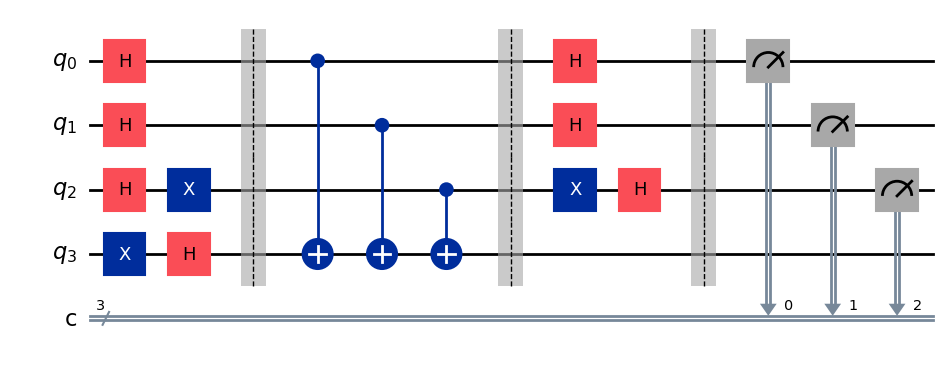

In [337]:
# Finally, apply H-gates again and then take measurements
place_hgates(dj_circuit)

dj_circuit.barrier()

def measure_dj(qc):
    # Don't measure last qubit
    for i in range(len(qc.qregs[0])-1):
        qc.measure(i, i)

measure_dj(dj_circuit)
dj_circuit.draw(output="mpl", style="iqp")

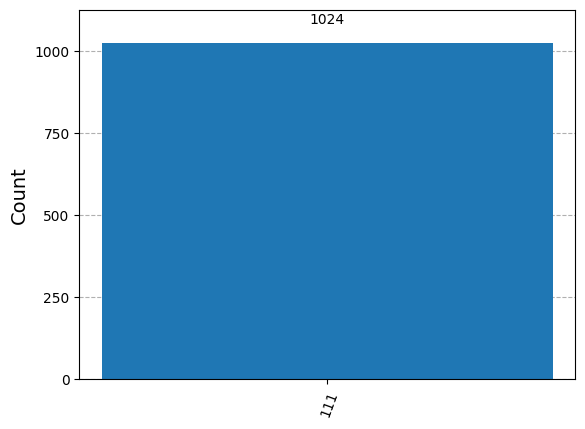

In [338]:
# View the results with a local simulator
dj_counts = sampler.run([dj_circuit]).result().get_counts()
plot_histogram(dj_counts)

In [339]:
# There is a 0% chance of measuring 000
assert dj_counts.get('000', 0) == 0

As predicted, this balanced oracle function will never result in a measurement of 000!

### Generalised Circuits

In [340]:
BALANCED = 'balanced'
CONSTANT = 'constant'
ALLOWED_CASES = [BALANCED, CONSTANT]

def dj_oracle(case, n):
    """
    This function takes in a string ("balanced" or "constant") along with the input
    register size (n) to return the oracle circuit for that kind of oracle function.
    """
    # Validate oracle cases
    assert case in ALLOWED_CASES
    
    oracle_qc = QCir(n+1)

    if case == BALANCED:
        # Generate a random number that determines which CNOTS to wrap in X-gates
        b = np.random.randint(1,2**n)
        # Prepare b for the circuit as a binary with enough 0-padding
        b_str = format(b, f'0{n}b')
        # Balanced oracles start by applying X-gates
        place_xgates(oracle_qc, b_str)
        # Then apply CNOT gates to all qubits
        place_cnots(oracle_qc)
        # Repeat X-gates to finish wrapping them
        place_xgates(oracle_qc, b_str)

    if case == CONSTANT:
        # Randomly decide if this oracle function is going to always return 0 or 1
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    # Tidy this up for circuit drawing purposes and to obfuscate what kind of oracle is in use
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate


In [341]:
def dj_algorithm(oracle, n):
    """
    Takes an oracle gate as input and builds a full Deutsch-Jozsa algorithm to measure what kind it is
    """
    dj_circuit = QCir(n+1, n)

    # Prepare the output qubit
    dj_circuit.x(n)
    dj_circuit.h(n)

    # Setup input register
    place_hgates(dj_circuit)

    # Run the supplied oracle function
    dj_circuit.append(oracle, range(n+1))

    # Repeat H-gates and measure
    place_hgates(dj_circuit)
    measure_dj(dj_circuit)

    return dj_circuit

Time for some sandboxing to test the circuit

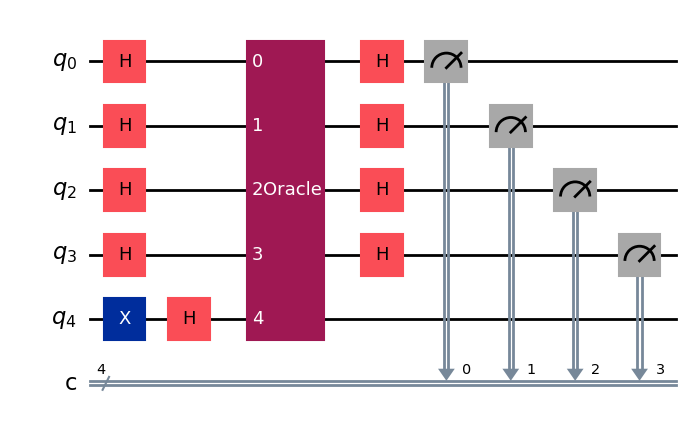

In [342]:
sb_n = 4
# Randomly pick a type of oracle function to interpret results
case = BALANCED if np.random.randint(2) == 1 else CONSTANT
sb_gate = dj_oracle(case, sb_n)
sb_circuit = dj_algorithm(sb_gate, sb_n)
sb_circuit.draw(output="mpl", style="iqp")

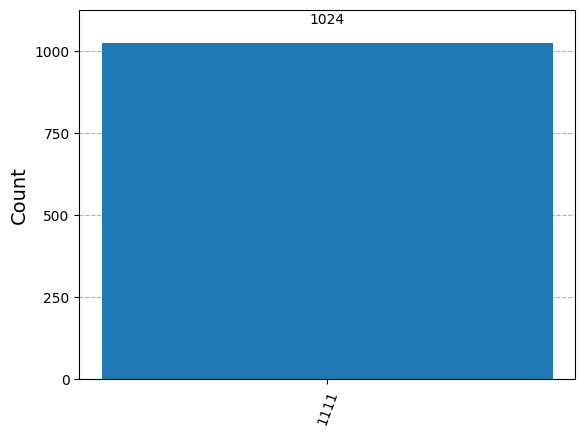

In [343]:
# Plot the results of running the circuit
trans_sb_circuit = transpile(sb_circuit, sampler)
sb_results = sampler.run(trans_sb_circuit).result().get_counts()
plot_histogram(sb_results)

Note that running the previous two steps multiple times will result in two different scenarios:
- If the oracle function was randomly chosen to be a CONSTANT oracle, then the result will always be 0000
- If the oracle function was randomly chosen to be a BALANCED oracle, then the result will always be 1111

#### Experimenting with real devices

In [344]:
# Additional imports
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# To run on hardware, select the backend with the fewest number of jobs in the queue
service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
backend.name

'ibm_kyiv'

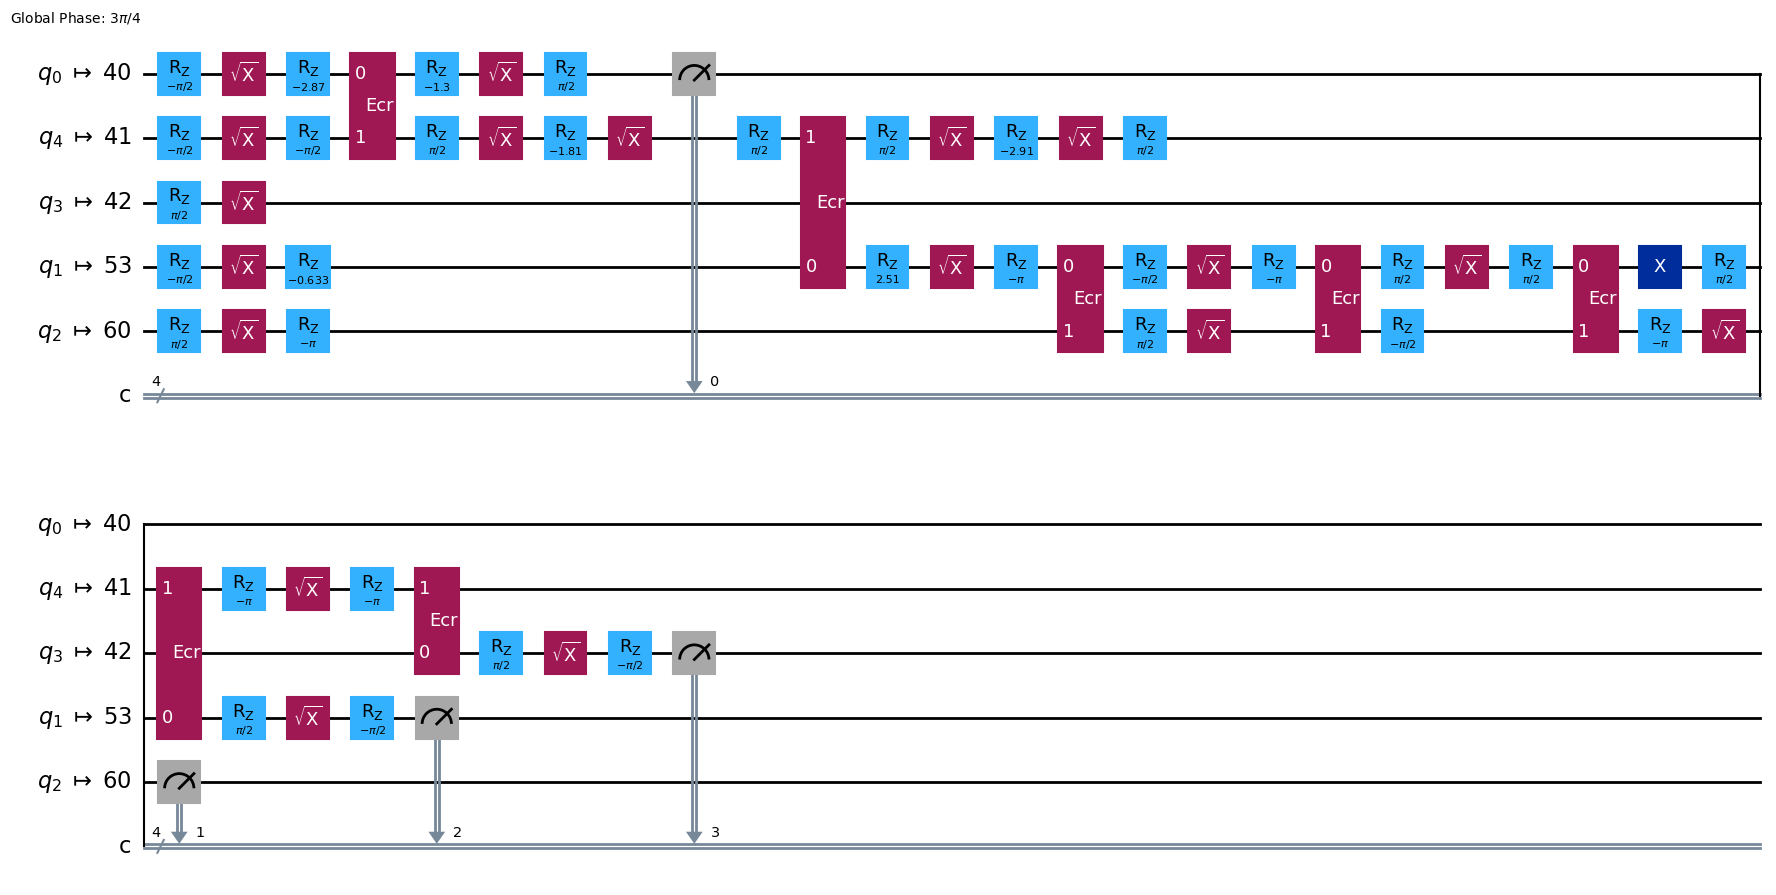

In [345]:
# Transpile the circuit for operating on real quantum hardward
target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(sb_circuit)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")

In [346]:
# Run the circuit and wait for the results
sampler2 = SamplerV2(mode=backend)
sampler2.options.default_shots = 1_000
result = sampler2.run([circuit_isa]).result()[0]

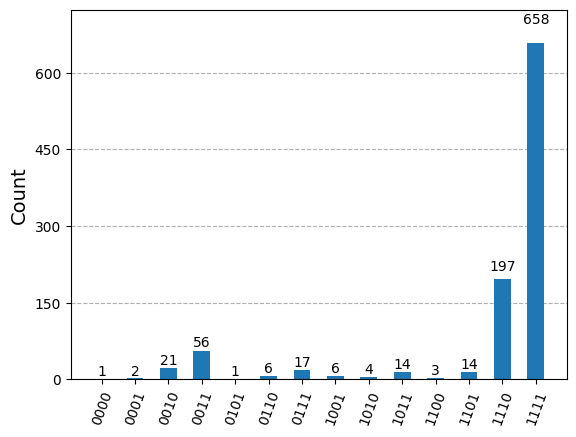

In [347]:
# Plot the results
test_counts = result.data.c.get_counts()
plot_histogram(test_counts)

The results from the real hardware generally align with the theoretical result, but we see some probability of measuring other values as well!

In [348]:
# Verify the results match expected
if case == BALANCED:
    assert max(test_counts) == '1' * sb_n
elif case == CONSTANT:
    assert max(test_counts) == '0' * sb_n
else:
    assert False # case should never be something other than these